## The normal distribution and "expectedness"

The Normal (or Gaussian) distribution describes the probability of a continuous random variable.
This is the (likely familiar) bell curve. 

### Definition
The Normal distribution has two parameters: the mean ($\mu$) and the standard deviation ($\sigma$). 
The pdf is symmetric and unimodel and defined over all values from negative infinity to positive infinity. 
Values close to the mean are much, much more likely that values further from the mean. 
Because of this, the Normal distribution describes phenomena or values of a r.v. that are more or less expected to be close to $\mu$---surprises are not very likely. 

\begin{align}
    f(x) &= \frac{1}{\sqrt{2\pi} \sigma} e^{ - \frac{(x-\mu)^{2}}{2\sigma}  }\\
         &= \frac{1}{\sqrt{2\pi \sigma^{2} } } \exp \left\{ - \frac{(x-\mu)^{2}}{2\sigma}  \right\} \\
         &= \left( 2\pi \sigma^{2} \right)^{-1/2} \exp \left\{ -\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^{2}  \right\}
\end{align}

### Expectation and variance

If $X$ is a r.v. and normally distributed $X \sim \mathcal{N}\left( \mu, \sigma^{2}\right)$,
the expectation is 

\begin{align}
    E(x) = \mu
\end{align}

and variance is 

\begin{align}
    Var(x) = \sigma^{2}
\end{align}

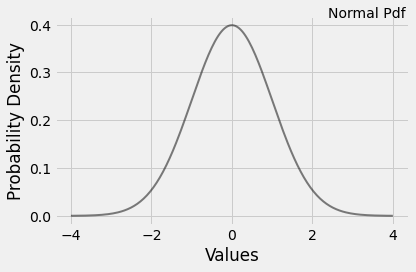

In [2]:
from scipy import stats

Pdf = stats.norm(0,1).pdf # first number is  mean and seoncd number is std dev
domain = np.linspace(-4,4,200) # 200 points linearly spaced between -3 and 3

plt.style.use("fivethirtyeight")
fig,ax = plt.subplots()

ax.plot(domain,Pdf(domain) ,'k-',lw=2,alpha=0.5)

ax.set_xlabel("Values")
ax.set_ylabel("Probability Density")

ax.text(0.99,0.99,"Normal Pdf",fontsize=14,transform=ax.transAxes,ha='right')

fig.set_tight_layout(True)
plt.show()

### The expectedness of Normal distributions

The normal distribution's pdf is a decreasing exponential of a squared quantity. 
We know exponentials increase and decrease fast, and squaring the term inside the exp means they grow or shrink even fast. 
Because of this, high probabilities are assigned to intervals close to the mean. 
In some sense, a r.v. with a normal distribution assumes data are more or less expected to be near the mean. 

To be more precise, a 0.68 probability is assigned to the interval within one standard deviation of the mean, 0.95 probability within 2 standard deviations and 0.997 within three standard deviations:

* $p[ (\mu - \sigma, \mu + \sigma) ]   = 0.68$
* $p[ (\mu - 2\sigma, \mu + 2\sigma) ] = 0.95$
* $p[ (\mu - 3\sigma, \mu + 3\sigma) ] = 0.997$


It is important to keep in mind that a normal distribution characterizes values expected to be close to their mean---most values will fall within 2 standard deviations.

### Z scores and "standardizing"

The normal distribution also plays a role in "standardizing" data. 
We can standardize a variable $X$ with the following algorithm:
1. Compute the mean of X
2. Compute the standard deviation of X
3. For each value in X
    1. subtract the mean
    2. divide the value in 3.1. by the standard deviation


By standardizing, the values of $X$ are put in terms of units of standard deviation. 
A value of $0$ mean the value is the same as the mean of the data.
A value of $1$ is one standard deviation larger than the mean and so on. 

Standardizing is important when you want to compare two variables that have different units, or that have different variances around their mean. 


## The Poisson distribution and incidence 

### Definition

A random variable $X$ has a Poisson distribution---$X\sim \text{Pois}\left( \lambda \right)$--- if it is discrete and it's probability mass function is 

\begin{align}
    p(X = k) = e^{-\lambda} \frac{ \lambda^{k} }{ k! }
\end{align}

A Poisson distributed random variable assigns probabilities to the number of events that occur over a specific time period. The parameter $\lambda$ is typically thought of as the rate of events per unit of time. For example, the number of deaths per month, number of phone calls per week, or number of emails per hour (so many). 

### Expected value and variance

The expected value is 

\begin{align}
    \text{E}(X) = \lambda
\end{align}

and the variance is 

\begin{align}
    \text{Var}(X) = \lambda
\end{align}

### Two major assumptions

The biggest assumption a Poisson random variable makes is that the expected number of events over a length of time $t$ is equal to $\lambda t$---the expected number of events are proportional to the length of time we observe. 
As an example, if we observed 10 influenza-like illness cases per week in Lehigh county, then we would expect to see 40 cases over a month (a 4-week period).

The same assumption goes for the probability of observing events too. 
Assuming $\lambda = $ 10 cases of influenza-like illness per week, the probability of observing 12 cases in a given week is 

\begin{align}
    p(X = 12) = e^{-10} \frac{ 10^{12} }{ 12! } = 0.09.
\end{align}

The probability of observing 12 cases over the period of a month (4 weeks) is

\begin{align}
    p(X = 12) = e^{-40} \frac{ 40^{12} }{ 12! } = 1.49 \times 10^{-7}.
\end{align}

Here, we needed to change our rate parameter from $\frac{\text{ILI cases}}{week}$ to $\frac{\text{ILI cases}}{month}$



### Application

As of 2020-10-04 at 14:00, the Pennsylvania Department of Health reported the following COVID-19 [data](https://www.health.pa.gov/topics/disease/coronavirus/Pages/Cases.aspx):

* 158,001 confirmed tests
* 5,544 probable tests
* 1,931,635 negative tests

We can define a Poisson random variable $(X)$ with rate parameter $\lambda = \frac{158,001}{2,095,180} = 0.075$ positive cases per test. We could redefine our $\lambda$ as $75$ positive cases per $1,000$ tests and compute probabilites like

\begin{align}
    p(X = 95) = \exp(-75) 75^{ 95 } / 95! = 0.003
\end{align}

and even plot the probability mass function for counts between 60 and 100

Text(0.99, 0.99, '$X\\sim \\mathrm{Pois}(75)$')

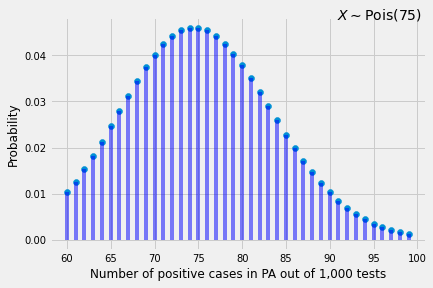

In [15]:
import scipy.stats 
fig, ax = plt.subplots()

poissonRVPMF = scipy.stats.poisson(75).pmf

domain = np.arange(60,100,1)

ax.scatter( domain, poissonRVPMF(domain) ) 
for x,y in zip(domain,poissonRVPMF(domain)):
    ax.plot( [x]*2, [0,y], color="b",alpha=0.5 )
ax.set_xlabel("Number of positive cases in PA out of 1,000 tests",fontsize=12)
ax.set_ylabel("Probability",fontsize=12)

ax.tick_params(which="both",labelsize=10)
ax.text(0.99,0.99,r"$X\sim \mathrm{Pois}(75)$",transform=ax.transAxes,ha="right")

## Sampling Distribution and Confidence intervals

### Definition of a sampling distribution

A **sampling distribution** describes the probability of a statistic given a fixed sample size from a population.    
For example, we could approximate sampling distribution for a statistic of $N$ observations (our fixed sample size) by randomly choosing $N$ observations from our population, computing our statistic, then randomly choosing another $N$ points from the population, computing our statistic, over and over. 

### Example of a sampling distribution
Suppose I wanted to study the proportion of strokes in a population. 
Let's generate a "fake" population of 5,000 patients. 

In [12]:
import numpy as np
population = [np.random.binomial(1,0.10) for _ in range(5*10**3)] # create population

Now for a sample size of 20, I'll choose 20 patients at random and compute my statistic the proportion of patients who experienced a stroke. 

In [38]:
import random 

sampleSize = 200
iterations = 2*10**3

samplingDistribution = []
for i in range(iterations):
    randomlySelectedSample = random.sample(population, sampleSize)  
    computeStatistic = np.mean( randomlySelectedSample )
    samplingDistribution.append(computeStatistic)    

And we can visualize the distribution of our statistic by plotting a histogram.

Text(0, 0.5, 'Frequency')

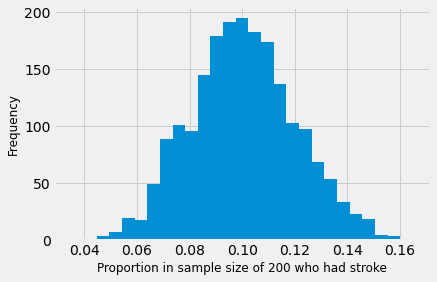

In [40]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots()
ax.hist( samplingDistribution,27)
ax.set_xlabel("Proportion in sample size of 200 who had stroke",fontsize=12)
ax.set_ylabel("Frequency",fontsize=12)

### Sampling distribution of the mean

Let's look at the The sampling distribution of the mean of several different random variables. 
We will take the mean of 1,000 iterations of 50 samples from a Poisson distribution, Binomial, and a Normal distribution. 

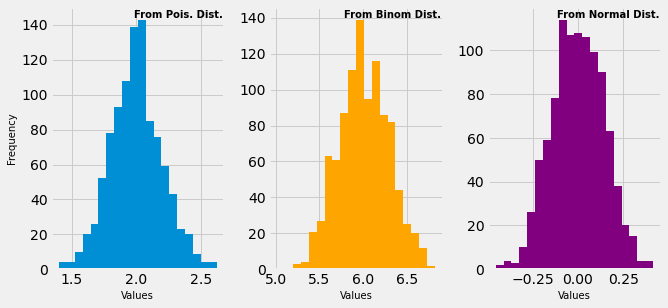

In [52]:
import numpy as np

iterations = 10**3
sampleSize = 50

fig,axs = plt.subplots(1,3)

# poisson
means = []
for it in range(iterations):
    poisson = np.random.poisson(2.,50) 
    meanpois = np.mean(poisson)
    means.append(meanpois)

ax = axs[0]
ax.hist(means,20)

ax.set_xlabel("Values",fontsize=10)
ax.set_ylabel("Frequency",fontsize=10)
ax.text(0.99,0.99,s="From Pois. Dist.",weight="bold",fontsize=10,ha="right",va="top",transform=ax.transAxes)

# binomial
means = []
for it in range(iterations):
    binom = np.random.binomial(20.,0.3,50) 
    meanBinom = np.mean(binom)
    means.append(meanBinom)

ax = axs[1]
ax.hist(means,20,color="orange")

ax.set_xlabel("Values",fontsize=10)
ax.text(0.99,0.99,s="From Binom Dist.",weight="bold",fontsize=10,ha="right",va="top",transform=ax.transAxes)


# normal
means = []
for it in range(iterations):
    norm = np.random.normal(0,1,50) 
    meanNorm = np.mean(norm)
    means.append(meanNorm)

ax = axs[2]
ax.hist(means,20,color="purple")

ax.set_xlabel("Values",fontsize=10)
ax.text(0.99,0.99,s="From Normal Dist.",weight="bold",fontsize=10,ha="right",va="top",transform=ax.transAxes)

fig.set_size_inches(9.5,9/2)
fig.set_tight_layout(True)

Though observations are drawn from three different distributions, the sampling distribution of the mean looks like a normal distribution. We see the characteristic unimodel, symmetric distribution of values (in this case the mean) with a fast drop off of values further from the peak.

### Central limit theorem (informal description)

The distribution of the mean of successive samples of from a population is well approximated by a normal distribution. 
But any normal distribution is defined by two parameters $\mu$ and $\sigma$. 
Given a sample of data $\mathcal{D}$, the first parameter ($\mu$) can be approximated by the mean of the dataset $\bar{\mathcal{D}}$ and the second parameter ($\sigma$) by the **standard error** of the data.

### Standard error

If $\mathcal{D} = [d_{1},d_{2},\cdots,d_{n}]$ is a dataset with values $d_{1}$,$d_{2}$ and so on, the standard error is defined as 

\begin{align}
    \text{SE}_{\mathcal{D}} = \frac{ s_{\mathcal{D}}}{\sqrt{n}}
\end{align}

where $s_{\mathcal{D}}$ is the standard deviation and $n$ is the number of data points.

So then the central limit theorem says (roughly) that for a r.v. $X$ with **any** distribution, 

\begin{align}
    \bar{X} \sim \mathcal{N} \left( \bar{x},  \frac{ s_{\mathcal{D}}}{\sqrt{n}}  \right)
\end{align}

where $\bar{x}$ is the mean of values from $X$, $s_{\mathcal{D}}$ is the standard deviation, and $n$ is the number of data points.

## Confidence intervals

### Definition
A confidence interval quantifies the range of possible values a sample statistic can be within.
Typically, a confidence interval is centered around the mean and is of the form

\begin{align}
    \left( \bar{x} - L, \bar{x} + L \right)
\end{align}

Confidence intervals have associated with them (not surprisingly given the name) a specific confidence, a value between 0 and 1 often turned into a percentage like "a 95% confidence interval". 

With a Y% confidence interval we can make a statement like:
If we sampled our data over and over and constructed a Y% confidence interval then %Y of those confidence intervals should contain the population parameter of interest.

### CI for the mean

We can use the Central limit theorem (CLT) to build a Y% confidence interval around the mean of a r.v.
The CLT says that the sampling distribution of the mean is a normal distribution centered on the mean of our data $(\mu)$ and $\sigma$ equal to the standard error.
And so a reasonable way to construct a confidence interval for the true $\mu$ is 

\begin{align}
    \text{Confidence interval} = \left( \bar{x} -z*\text{SE}_{x}  , \bar{x} + z*\text{SE}_{x} \right)
\end{align}

But what is this $z$ in our confidence interval equation for the mean?

A z-score $(z)$ is the number of standard deviations a away from the mean of a random variable $Z$. 
The z-score is associated with a Normal distribution and every z-score is associated with a probability as follows:

If $Z$ is a Normally distributed r.v. then 

\begin{align}
    p( Z < \text{z-score} ) = \text{the area under the normal curve up until z}
\end{align}

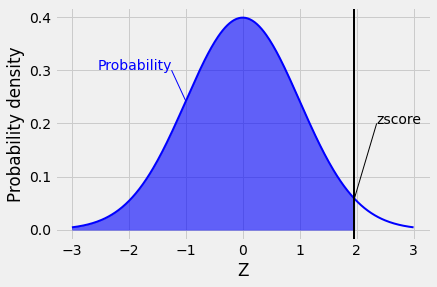

In [64]:
import scipy.stats
import numpy as np

Z = scipy.stats.norm(0,1).pdf
zscore = 1.96

domain = np.linspace(-3,3,300)

plt.style.use("fivethirtyeight")
fig,ax = plt.subplots()

ax.plot( domain, Z(domain) ,lw = 2., color="blue" )

# area under the curve
domainTillScoree = np.linspace(-3,zscore,200)
ax.fill_between( domainTillScoree, [0]*200 , Z(domainTillScoree), color="blue",alpha=0.60 )

ax.text(-1.25,0.3,"Probability",color="blue",ha="right")
ax.plot([-1.25,-1],[0.3,Z(-1)],color="blue",lw=1  )

#zscore line
ax.axvline(zscore,color="k",lw=2)
ax.text(zscore*1.2,0.2,"zscore")
ax.plot([zscore*1.2,zscore],[0.2,Z(zscore)],color="black",lw=1  )

ax.set_ylabel("Probability density")
ax.set_xlabel("Z")

plt.show()

### Two-sided confidence interval

To compute a Y% confidence interval, you need to find the corresponding z-score $(z)$ so that the area under the curve from $-z$ to $+z$ is $Y/100$.
For example, the area under the curve between -1.96 and 1.96 is 0.95. 

This then corresponds to a 95% confidence interval of a r.v. X as follows

\begin{align}
    \text{95% Confidence Interval for the mean} = ( \bar{x} - 1.96*\text{SE}_{x}, \bar{x} + 1.96*\text{SE}_{x}   )
\end{align}

We can create different % confidence intervals for the mean of a random variable by using different z scores. 
The probability between a z-score of -1.28 and 1.28 is 0.80 and so an 80% confidence interval for the mean of a random variable is 

\begin{align}
    \text{80% Confidence Interval for the mean} = ( \bar{x} - 1.28*\text{SE}_{x}, \bar{x} + 1.28*\text{SE}_{x}   )
\end{align}

Changing the zscore changes the confidence interval. 

### one sided confidence interval